In [146]:
import pandas  as pd #Data Frame
import numpy as np #Np array manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sb #Visualization

## 1.Supervised Machine Learning Workflow

![Image](https://drive.google.com/uc?export=view&id=10icWcvvpHbuOxXy97oeXIK6h1RwXiDkJ)


## 1.1 Data Preparation
- Get the "Housing.csv" from https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

- Get the "diabetes.csv" from https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database



- Using pandas library: https://pandas.pydata.org/docs/user_guide/10min.html#categoricals

In [147]:
HOUSE = True
data = pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [148]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## 1.2 Convert Categorical to Numerical
**Label Encoder** https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- Turn Categorical to Numerical


**One Hot Encoding** https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
- Let's say we have 3 categories cat, dog, chicken. If we use 0 = cat, 1 = dog, 2 = chicken, there is an implicit "distance relationship" such as:
  - Dog is 1 unit different from cat and chicken
  - The difference between cat-chicken is 2 times the difference between cat-dog

- Having the yes-no, binary relationship prevent this situation



In [149]:
from sklearn.preprocessing import LabelEncoder

INCLUDE_CATEGORY = True
if INCLUDE_CATEGORY:
  le = LabelEncoder() # Turn categorical into numerical
  # LabelEncoder is kind of an Operator: it should do something
  # fit
  # transform
  # fit_transform
  data["mainroad"] = le.fit_transform(data["mainroad"])
  data["guestroom"] = le.fit_transform(data["guestroom"])
  data["basement"] = le.fit_transform(data['basement'])
  data["hotwaterheating"] = le.fit_transform(data["hotwaterheating"])
  data["airconditioning"] = le.fit_transform(data["airconditioning"])
  data["prefarea"] = le.fit_transform(data["prefarea"])
  data = pd.get_dummies(data, columns = ["furnishingstatus"]) # One hot encoding
else:
  data = data[["price","area","bedrooms","bathrooms","stories", "parking"]]

data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


## 1.3 Feature Engineering/ Selection


<Axes: >

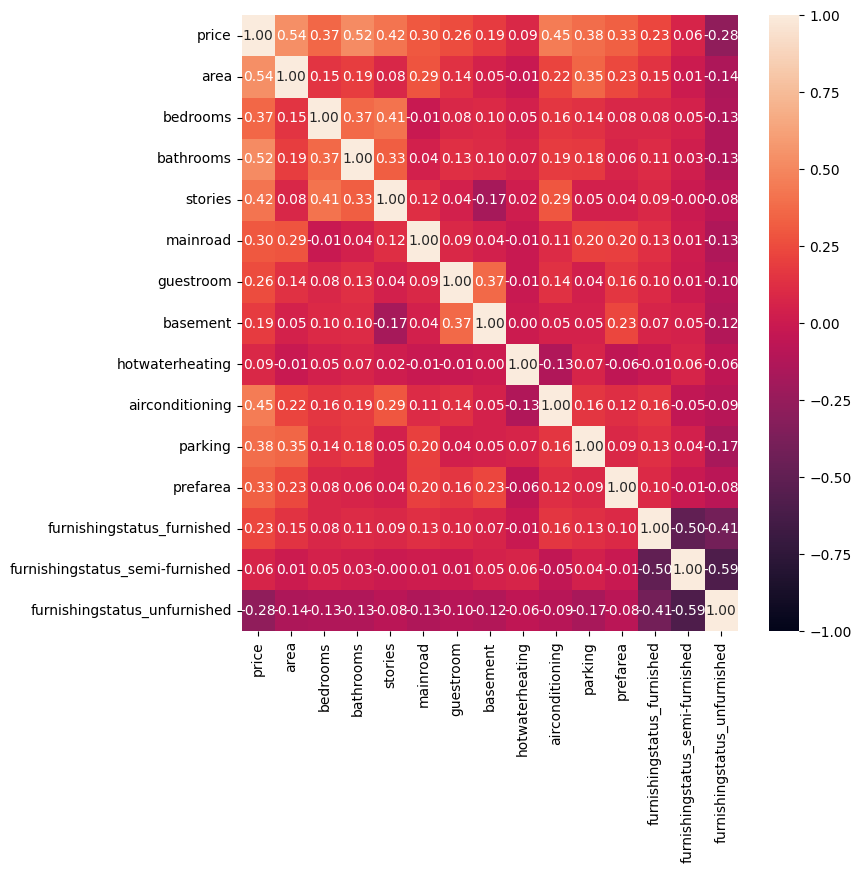

In [150]:
f = plt.figure(figsize = (8,8)) # Setting up the figure, matplotlib thing
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f") # Seaborn
# data.corr()-> correlation. type(data) = DataFrame

In [151]:
X = data.drop(columns = ["price"])  # X, y ... convention in ML. Remove price
y = data["price"]

## 1.3 Train Test Split

Train Test Split documentation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # Train Test

print(len(X_train))
print(len(X_test))
print(type(X_train))


381
164
<class 'pandas.core.frame.DataFrame'>


## 1.4 Seting up the model

![Image](https://drive.google.com/uc?export=view&id=1a7Cnc6jfxn1iCxtwh-W5Bopvb7kUQ-D2)


In [153]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression() # initialize
regression_model.fit(X_train, y_train) # Fit data
# model.fit() handles all of the cost function calculation and gradient descent, optimization for us!

y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)

## 1.5 Metrics

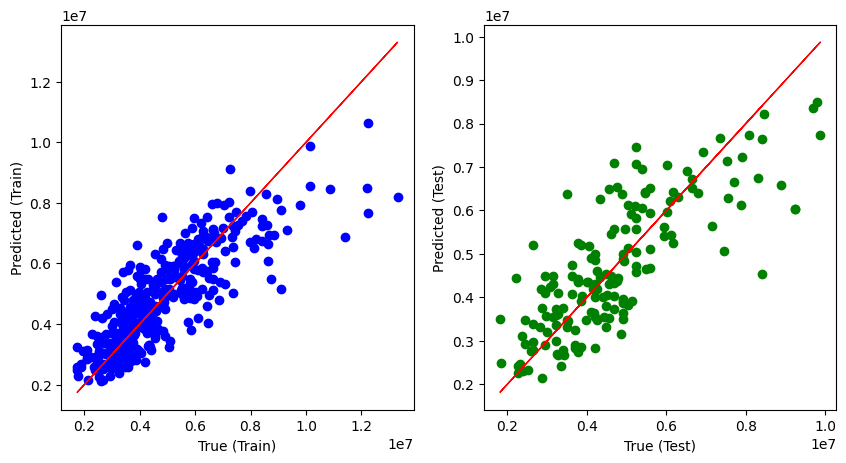

In [154]:
# Plot the graph. If the True and Prediction aligns, they should stay on the y = x 45 degree line
f, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True (Train)")
axes[0].set_ylabel("Predicted (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True (Test)")
axes[1].set_ylabel("Predicted (Test)")
plt.show()


In [155]:
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regression_model.score(X_train, y_train)) # R^2 Variance
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regression_model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()



Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6981324698555322
Mean Squared Error (MSE) 	: 1119652826081.3499

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6166627978464301
Mean Squared Error (MSE) 	: 1143419577461.0813



# 2.Logistic Regression
## 2.1 Data prepapration

In [166]:
HOUSE = False

if HOUSE:  # True to keep using Housing data, predict "preferrable area" based on price, rooms, etc...
  X = data.drop(columns = ["prefarea"])
  y = data["prefarea"]
else:  # Change to using diabetes data, predicting diabetes based on various health metrics
  data = pd.read_csv("diabetes.csv")
  X = data.drop(columns = ["Outcome"])
  y = data["Outcome"]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

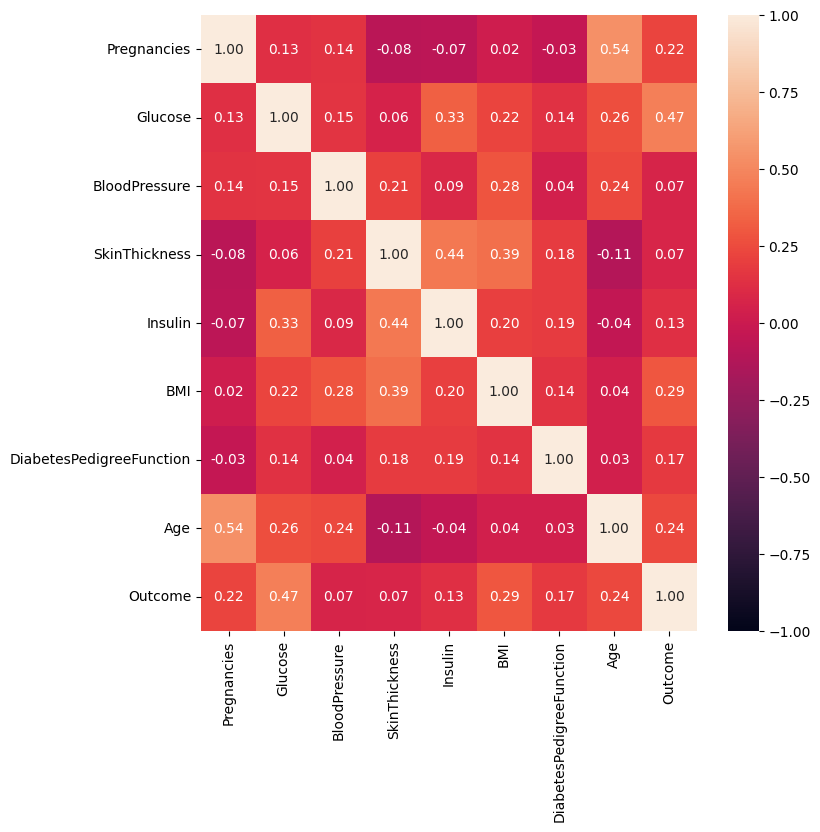

In [167]:
## Correlation
f = plt.figure(figsize = (8,8))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [168]:
# Check X
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [169]:
# Check y
np.array(y)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [170]:
from sklearn.linear_model import LogisticRegression

## Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)


## Setup model and fit the model
classification_model = LogisticRegression()
classification_model.fit(X_train, y_train) # fit data


## Get prediction, this assume the threshold of 0.5
y_train_pred = classification_model.predict(X_train)
y_test_pred = classification_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2.2 Metrics

Text(0.5, 23.52222222222222, 'Train Predicted')

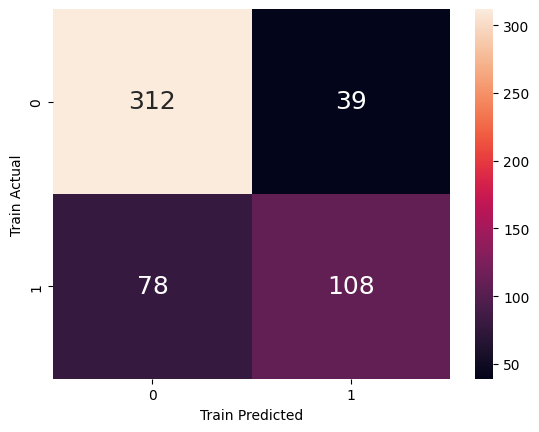

In [171]:
from sklearn.metrics import confusion_matrix

## Confusion matrix: Predict vs Actual  on Train data
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.ylabel('Train Actual')
plt.xlabel('Train Predicted')


Text(0.5, 23.52222222222222, 'Test Predicted')

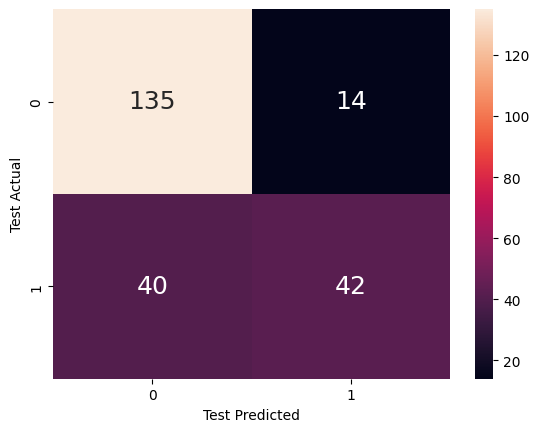

In [172]:
# Confusion matrix on Test data
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.ylabel('Test Actual')
plt.xlabel('Test Predicted')




- Precision and Recall Score
![Image](https://drive.google.com/uc?export=view&id=1pAhJ2hDWfUhaVJEE31v4k-SsRiANjFzX)


- Classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- Accuracy score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html



In [173]:
from sklearn.metrics import classification_report, accuracy_score
print("TRAIN")
print(classification_report(y_train, y_train_pred))
print("Accuracy ", accuracy_score(y_train, y_train_pred))
print("TEST")
print(classification_report(y_test, y_test_pred))
print("Accuracy ", accuracy_score(y_test, y_test_pred))


TRAIN
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       351
           1       0.73      0.58      0.65       186

    accuracy                           0.78       537
   macro avg       0.77      0.73      0.75       537
weighted avg       0.78      0.78      0.78       537

Accuracy  0.7821229050279329
TEST
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       149
           1       0.75      0.51      0.61        82

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.76      0.77      0.75       231

Accuracy  0.7662337662337663


## 2.3 Receiver Operating Curve (ROC) and Area under the curve (AUC)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html


![Curve](https://drive.google.com/uc?export=view&id=19Em2MkSOIHXib6b9zWdH3ETx707MVPXo)


In [174]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Instead of getting the 0.5 threshold label
# Get probability instead of the label
y_train_pred_prob = classification_model.predict_proba(X_train)
y_test_pred_prob = classification_model.predict_proba(X_test)



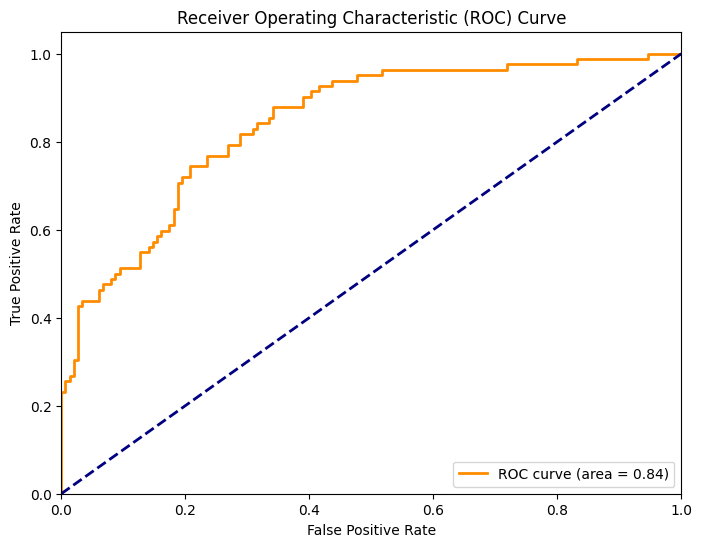

Threshold  [1.98804235 0.98804235 0.78979745 0.78864257 0.77900142 0.75528409
 0.74377052 0.72813263 0.70857501 0.69326589 0.60967432 0.60431095
 0.60319439 0.56114555 0.55707156 0.55365735 0.5535207  0.54770614
 0.54436792 0.52039421 0.50417263 0.50357866 0.50179929 0.47626392
 0.46227786 0.44822712 0.43055919 0.42544419 0.42367636 0.41588404
 0.41266087 0.40415514 0.39940355 0.39508362 0.39127973 0.38600352
 0.37028187 0.36794572 0.34626958 0.34430246 0.34400825 0.34099091
 0.33215566 0.31960335 0.31276294 0.29246477 0.28098265 0.27371219
 0.26544033 0.25744153 0.25445902 0.25142882 0.24581607 0.2394699
 0.23475219 0.23235301 0.23108943 0.20685534 0.20496051 0.20046462
 0.19630471 0.18810682 0.18678864 0.17621426 0.17517758 0.15982651
 0.15820586 0.14090788 0.14017454 0.10088463 0.09893567 0.07397355
 0.07306246 0.04438967 0.03644681 0.00247122]


In [175]:

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Threshold ", thresholds)

# Reference

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

https://www.datacamp.com/tutorial/understanding-logistic-regression-python
